In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/diabetes2.csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df['Age'].dtype

dtype('int64')

In [ ]:
df['Pregnancies'].dtype

dtype('int64')

In [ ]:
df['Glucose'].dtype

dtype('int64')

In [ ]:
df['BloodPressure'].dtype

dtype('int64')

In [ ]:
df['SkinThickness'].dtype

dtype('int64')

In [ ]:
df['Insulin'].dtype

dtype('int64')

In [ ]:
df['BMI'].dtype

dtype('float64')

In [ ]:
df['DiabetesPedigreeFunction'].dtype

dtype('float64')

In [ ]:
df['Outcome'].dtype

dtype('int64')

In [ ]:
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [ ]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [ ]:
# test,train split
X = df.drop(columns=['Outcome'])  # Replace 'Outcome' with your target column
y = df['Outcome']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # stratify to make sure equal proportion of all classes in test and train

In [ ]:
# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Initialize the Logistic Regression model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='liblinear', class_weight = 'balanced',random_state=42)

In [ ]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'max_iter': [100, 200, 500]

}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', verbose=1) # here include stratified also
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=42, solver='liblinear'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 500], 'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=1)

In [ ]:
# Best parameters and model
best_params = grid_search.best_params_
print("Best parameters:", best_params)


Best parameters: {'C': 1, 'max_iter': 100, 'penalty': 'l1'}


In [ ]:
best_model = grid_search.best_estimator_

In [ ]:

# Evaluate the model
# Train accuracy this means finding accuracy for how model works for already trained data
from sklearn.metrics import accuracy_score
y_train_pred = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.7671009771986971


In [ ]:
# Test accuracy
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", test_accuracy)

Testing Accuracy: 0.7402597402597403


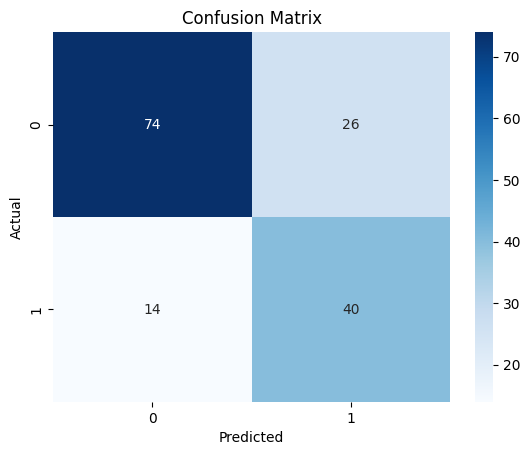

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Classification report this includes precision,recall,f1score
from sklearn.metrics import classification_report
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.74      0.79       100
           1       0.61      0.74      0.67        54

    accuracy                           0.74       154
   macro avg       0.72      0.74      0.73       154
weighted avg       0.76      0.74      0.74       154



In [ ]:
# we have to increase recall, which is crucial for this diabetics case,FN shold be low
# first try class weights = blanced, stratified and hyperparameter tuning( i already did)
# apart from above try to change default threshold value
# Lowering the threshold can increase recall (but might decrease precision), while raising the threshold can improve precision (but might decrease recall).
# then use other classifiers and may perform proper feature engineering, sampling techinques and ensemlbe models

In [ ]:
# ROC-AUC score
from sklearn.metrics import roc_auc_score
y_test_prob = best_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_test_prob)
print("ROC-AUC Score:", roc_auc)

#Ideal ROC-AUC Range:
# 0.8 to 0.9: A ROC-AUC score in this range is typically considered excellent for most classification tasks.
# >0.9: While rare, achieving a score above 0.9 generally indicates an exceptionally well-performing model.

ROC-AUC Score: 0.8237037037037037


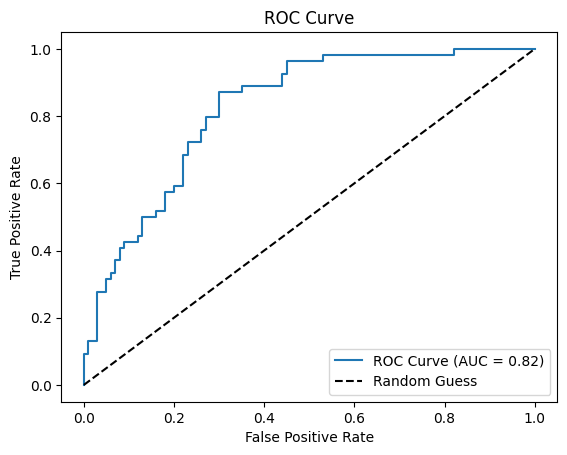

In [ ]:
# Plot the ROC curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()